# SFI 2024 - Rozwiązując korki
### Notebook 1 - Teoria grafów

W ramach tego notebooka dowiemy jak posługiwać się grafami w Pythonie z wykorzystaniem biblioteki Networkx.

In [1]:
import matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

***
# Struktury danych grafu

Do przedstawienia najważniejszych cech wykorzystamy graf [Zachary Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

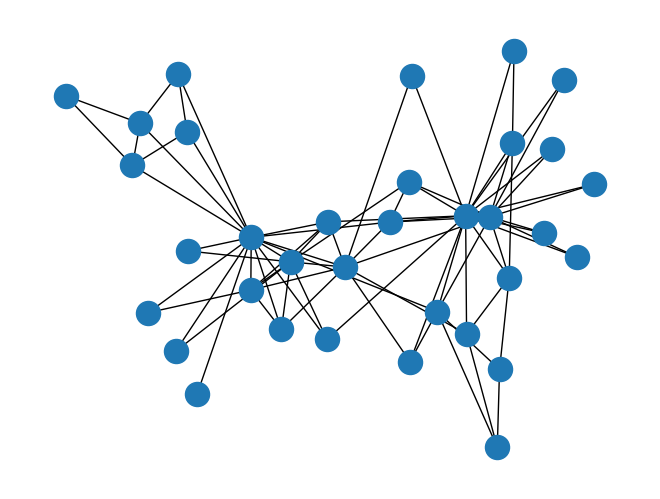

In [2]:
G = nx.karate_club_graph()
nx.draw(G)

### Dostęp do danych w grafie

In [3]:
# Dostęp do wierzchołków
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [4]:
# Dostęp do konkretnego wierzchołka
G.nodes[0]

{'club': 'Mr. Hi'}

In [5]:
# Dostęp do krawędzi
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [6]:
# Dostęp do konkretnej krawędzi
G.edges[(0, 1)]

{'weight': 4}

In [7]:
# Lub
G[0][1]

{'weight': 4}

In [8]:
# Dostęp do wartości atrybutu wierzchołka
G.nodes[0]['club']

'Mr. Hi'

In [9]:
# Dostęp do wartości atrybutu krawędzi
G[0][1]['weight']

4

***
# Miary centralności

In [10]:
def draw_graph_and_centrality(G, pos, ax, centrality=None, centrality_name=None):
    if centrality is not None:
        node_color = list(centrality.values())
        nodelist = centrality.keys()
    else:
        node_color = None
        nodelist = None

    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma,
                                   node_color=node_color,
                                   nodelist=nodelist,
                                   ax=ax)
    nodes.set_norm(mcolors.Normalize(vmin=0, vmax=0.7))
    nx.draw_networkx_edges(G, pos, ax=ax)
    ax.axis('off')
    ax.set_title(centrality_name)

#### Korzystając z biblioteki NetworkX, oblicz następujące miary centralności:
- Degree centrality
- Closeness centrality
- Betweenness centrality

Podpowiedź:
[https://networkx.org/documentation/stable/reference/algorithms/centrality.html](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)

In [13]:
degree_centrality = None
closeness_centrality = None
betweenness_centrality = None

/home/thmtt/miniconda3/envs/sfi_2024/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


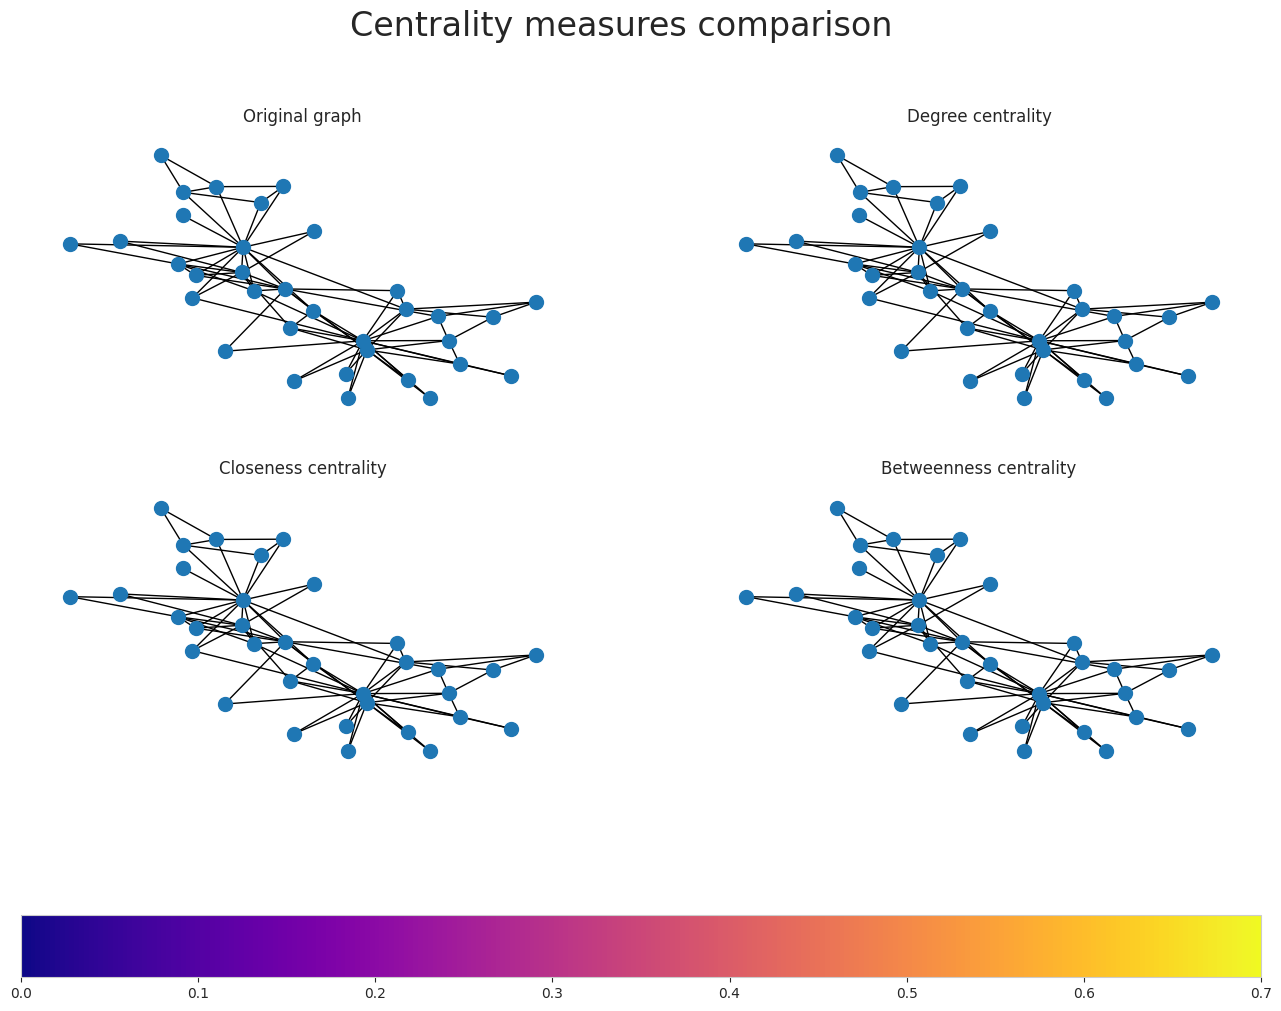

In [12]:
fig, ax = plt.subplots(2, 2)
ax = ax.ravel()
pos = nx.spring_layout(G, seed=40)

draw_graph_and_centrality(G, pos, ax[0], centrality_name='Original graph')
draw_graph_and_centrality(G, pos, ax[1], centrality=degree_centrality, centrality_name='Degree centrality')
draw_graph_and_centrality(G, pos, ax[2], centrality=closeness_centrality, centrality_name='Closeness centrality')
draw_graph_and_centrality(G, pos, ax[3], centrality=betweenness_centrality, centrality_name='Betweenness centrality')

fig.colorbar(matplotlib.cm.ScalarMappable(norm=mcolors.Normalize(0, 0.7), cmap=plt.cm.plasma), orientation='horizontal', ax=ax)
fig.suptitle('Centrality measures comparison', fontsize=24)
fig.set_size_inches(16, 12)